In [2]:
# Loading the necessary libraries
import scipy
import numpy
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
#show figures inside the jupyter blocks
get_ipython().magic(u'matplotlib inline')
from matplotlib.colors import LogNorm
from __future__ import division
from scipy import ndimage
import scipy
import scipy.fftpack
import pylab
from scipy import pi
#improve resolution of the showed images
%config InlineBackend.figure_format = 'retina'

#algorithm to substract the baseline
from scipy import sparse
from scipy.sparse.linalg import spsolve
def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in range(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

In [3]:
#load the necessary files
exp1 = np.fromfile('D://Figures+data//osc.dat',dtype=float,count=-1, sep=" ")
exp1 = np.reshape(exp1, (251, 1001))
#5x the original array
cj = np.fromfile('D://repeatedImage.txt',dtype=float,sep=" ")
cj= np.reshape(cj, (750, 2500))

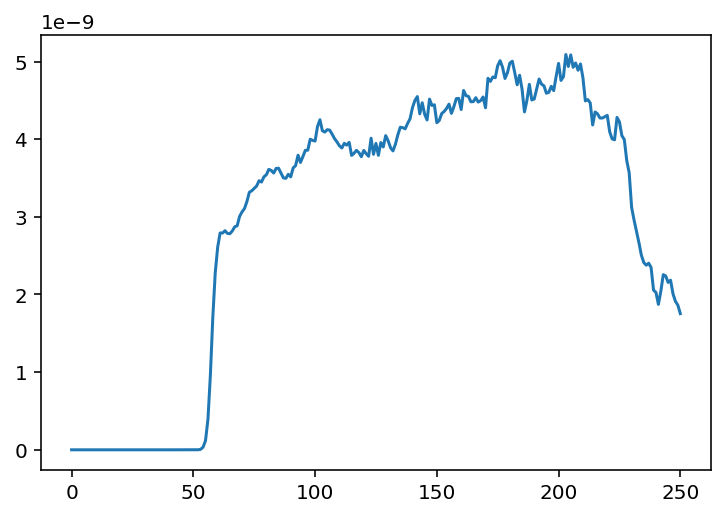

In [4]:
plt.plot(exp1[:,900])

In [5]:
#take only deterministic part
exp1=exp1[50:200,0:500]
#remove the baseline
for i in range(150):
    dat=baseline_als(exp1[i],10000,0.01,100)
    exp1[i]=exp1[i]-dat

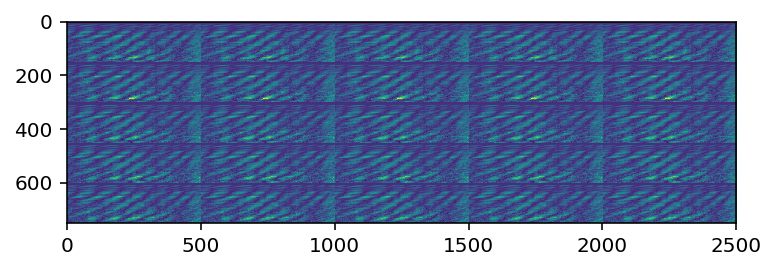

In [16]:
#interpolate the data with spline function
from scipy import fftpack
from matplotlib.colors import LogNorm
from scipy import interpolate
from scipy import ndimage

mymin,mymax = 0,3
X = np.linspace(1,1001,1001)
Y = np.linspace(1,251,251)

x,y = np.meshgrid(X,Y)



a=scipy.ndimage.interpolation.zoom(cj,zoom=1,mode='wrap',prefilter=True)
plt.imshow(cj)


In [6]:
a.shape

(3000, 10000)

(0, 20)

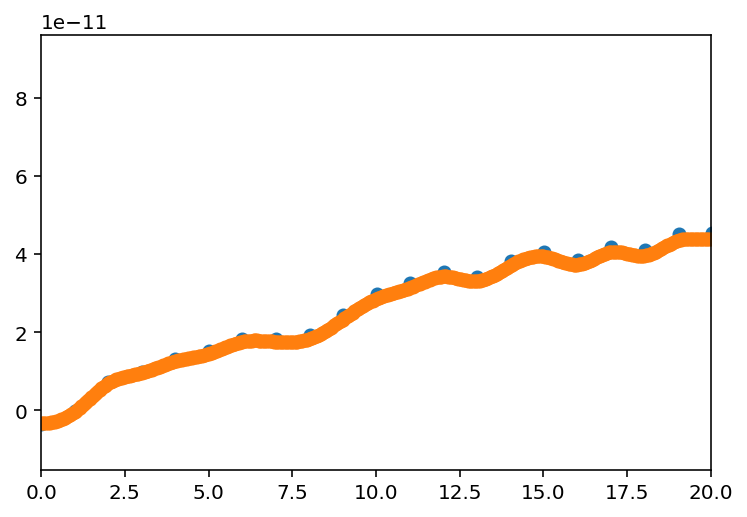

In [ ]:

x1=np.linspace(0,500,500)
x2=np.linspace(0,500,10000)
plt.plot(x1,exp1[10],'o')
plt.plot(x2,a[200],'o')
plt.xlim(0,20)

In [25]:
#filtering the data
g = ndimage.gaussian_filter(a, 10)
m = ndimage.median_filter(a,10)

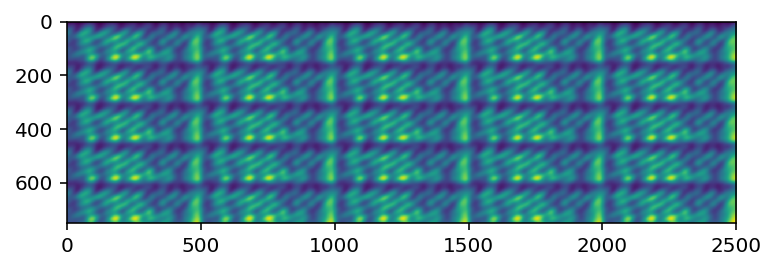

In [28]:
#plt.plot(a[100],'k')
#plt.plot(gauss_denoised[100],'r')
#plt.plot(med_denoised[100],'b')
plt.imshow(g)

In [57]:
fft2 = fftpack.fft2(a)
F_mag = np.abs(np.fft.fftshift(fft2))

#fft22 = fftpack.fft2(exp1)
#F_mag2 = np.abs(np.fft.fftshift(fft22))



#plt.ylim(400,500)

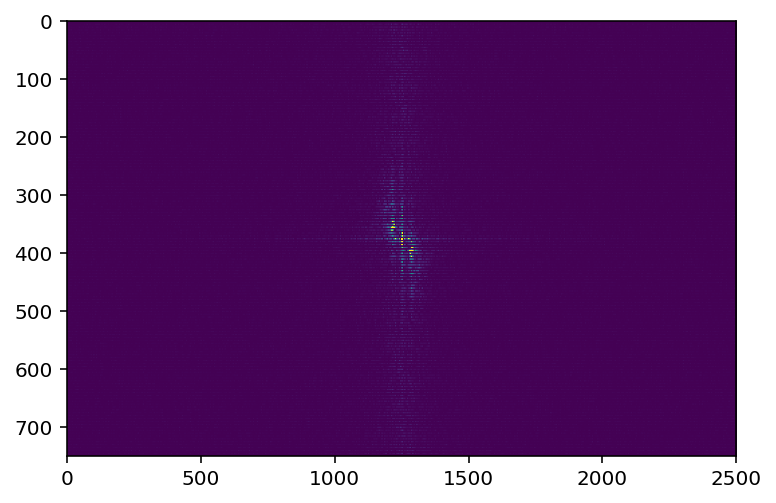

In [59]:
#plt.subplot(121)
plt.imshow(F_mag,vmax=1E-6,interpolation='spline36',aspect='auto')
#plt.xlim(1000,1500)
#plt.ylim(350,450)
#plt.subplot(122)
#plt.imshow(F_mag2, interpolation='none',aspect='auto')
#plt.xlim(220,270)

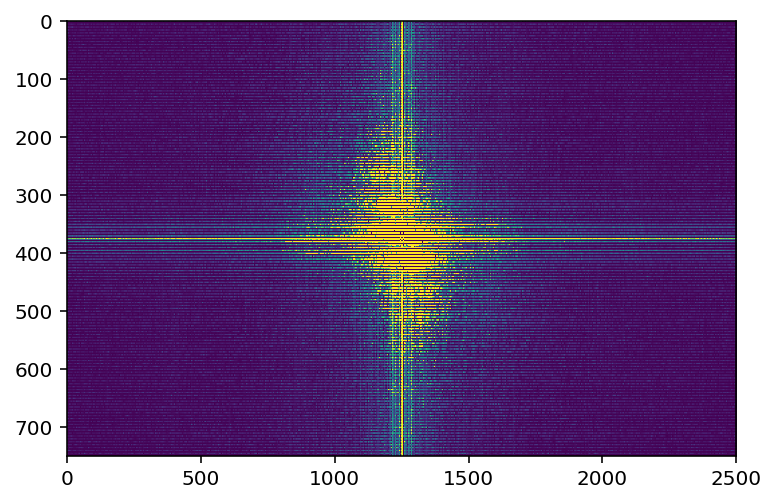

In [53]:
m2 = ndimage.median_filter(F_mag,1)
plt.imshow(m2,vmax=1E-8,interpolation='spline36',aspect='auto')